## 1 - Initial analysis of the cropped Quotebank dataset

We have filtered out all the rows corresponding to quotes that did not contain any of the keywords related to gun control. The remaining rows have been added to a new file: 'quotes-cropped.json', which will be one of our main datasets for this project. It is much more reasonnable in size (550 Mo) than the full Quotebank dataset. This will allow us to work with Jupyter lab with all the data we need.

In [10]:
#Import usefull libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install tld
from tld import get_tld
import json
import bz2
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Disable some pandas warnings we don't need
pd.options.mode.chained_assignment = None

Since we only consider those quotes from American online newspapers, we should be able to determine which country the websites
belong to.
In order to reach this target, we choose to use a new dataset which contains country-website pairs.

In [2]:
def get_domain(url):
    res = get_tld(url, as_object=True)
    return res.domain

new_src = pd.read_csv('data/news.txt', delimiter="\t", header=None, encoding = "ISO-8859-1")
new_src.columns=['id','unknown','date','country','media','website','title']
new_src['domain']=new_src.apply(lambda x : get_domain(x['website']),axis=1)
new_src.drop_duplicates(inplace=True, subset=['domain'], keep='first')
new_src.head()

,id,unknown,date,country,media,website,title,domain
0,11241,397,13-01-06,US,Kotaku,http://kotaku.com/5973495/author-of-the-warrio...,"Author of The Warriors, Cult Film Adapted to H...",kotaku
1,11242,757,13-01-06,US,Michigan Radio,http://michiganradio.org/post/thats-what-they-...,That's What They Say: Dialect Society chooses ...,michiganradio
2,11243,755,13-01-06,US,New York Daily News,http://www.nydailynews.com/life-style/eats/bes...,Best of New York: Croissant,nydailynews
3,11244,1677,13-01-06,US,OregonLive.com,http://www.oregonlive.com/performance/index.ss...,Reflecting on a quarter-century of growth in P...,oregonlive
4,21242,794,13-01-11,US,Ars Technica,http://arstechnica.com/gadgets/2013/01/ask-ars...,Ask Ars: Does Facebook auto-delete content aft...,arstechnica


Operating on the file quotes-cropped, we assign to each quotation a new field 'country' according to the media which quotes
the sentence.


In [ ]:
path_to_out = 'data/quotes-cropped-with-country.json.bz2'
with bz2.open("data/quotes-cropped.json.bz2", 'rb') as s_file:
    with bz2.open(path_to_out, 'wb') as d_file:
        for instance in s_file:
                instance = json.loads(instance) # loading a sample
                urls = instance['urls'] # extracting list of links 
                instance['country']=np.nan
                for url in urls:
                    domain=get_domain(url)
                    if len(new_src[new_src['domain']==domain])>=1:
                        instance['country']=new_src[new_src['domain']==domain]['country'].item()
                        break
                d_file.write((json.dumps(instance)+'\n').encode('utf-8'))

In [81]:
# New dataframe with the data ('quotes-cropped.jspon')
with bz2.open("data/quotes-cropped-with-country.json.bz2", 'rb') as s_file: 
    df_original = pd.read_json(s_file, lines=True)
df_original.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,country
0,2015-11-17-031545,"However, that had nothing to do with the blast...",Dawood Ibrahim,[Q553191],2015-11-17 13:32:58,3,"[[Dawood Ibrahim, 0.6072], [None, 0.338], [San...",[http://www.newindianexpress.com/nation/Part-o...,E,IN
1,2015-12-29-000719,91 percent of suspected terrorists who attempt...,Patrick Murphy,"[Q17418821, Q21170773, Q2224935, Q23418906, Q3...",2015-12-29 15:42:57,4,"[[Patrick Murphy, 0.8398], [None, 0.1579], [Je...",[http://politifact.com/florida/statements/2015...,E,US
2,2015-06-15-000921,a powerful and compelling motive to lie about ...,None,[],2015-06-15 21:39:12,1,"[[None, 0.7388], [Joseph Thompson, 0.2313], [A...",[http://dailylocal.com/general-news/20150613/n...,E,None
3,2015-12-08-003771,After the failure of the U.S. Congress to pass...,Roy Cooper,"[Q16106910, Q7372694, Q7372695]",2015-12-08 16:15:05,1,"[[Roy Cooper, 0.928], [None, 0.0574], [Frank P...",[http://digtriad.com/story/news/2015/12/08/sho...,E,None
4,2015-01-09-024195,I got back inside and then they started shooti...,Herman Torres,[Q18285204],2015-01-09 03:39:35,1,"[[Herman Torres, 0.9218], [None, 0.0782]]",[http://www.wesh.com/news/orange-county-sherif...,E,US


In [84]:
df_original=df_original[df_original['country']=='US']
df_original.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,country
1,2015-12-29-000719,91 percent of suspected terrorists who attempt...,Patrick Murphy,"[Q17418821, Q21170773, Q2224935, Q23418906, Q3...",2015-12-29 15:42:57,4,"[[Patrick Murphy, 0.8398], [None, 0.1579], [Je...",[http://politifact.com/florida/statements/2015...,E,US
4,2015-01-09-024195,I got back inside and then they started shooti...,Herman Torres,[Q18285204],2015-01-09 03:39:35,1,"[[Herman Torres, 0.9218], [None, 0.0782]]",[http://www.wesh.com/news/orange-county-sherif...,E,US
20,2015-11-26-034388,I'm letting him try to find it for himself. He...,Byron Scott,[Q538009],2015-11-26 18:51:56,3,"[[Byron Scott, 0.8244], [None, 0.1685], [Kobe ...",[http://www.latimes.com/sports/lakers/la-sp-la...,E,US
24,2015-07-30-026870,He described a shooting that looked nothing li...,Lawrence Middleton,[Q16091535],2015-07-30 05:00:00,12,"[[Lawrence Middleton, 0.8756], [None, 0.1233],...",[http://feeds.latimes.com/~r/features/books/~3...,E,US
26,2015-08-21-026312,"He was not armed, he did not have a gun, our i...",None,[],2015-08-21 20:54:00,2,"[[None, 0.8635], [Sam Dotson, 0.1133], [Michae...",[http://www.latimes.com/nation/la-na-black-mis...,E,US


We will start by plotting the number of quotes containing at least one of our keywords over time (i.e. between 2015 and 2020). Even though some quotes will be irrelevant (e.g. "we were **shooting** a movie"), we assume the distribution of these irrelevant quotes to be close to uniform for the moment.

Our plot should therefore give a good first impression on how much people/the media has been speaking about gun control during these five years.

In [85]:
# Keep only the columns that we need for our initial analysis
df = df_original[['date','quotation']]

# Convert data column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort dataframe by date
df = df.sort_values(by=['date'])

df.head()

,date,quotation
55989,2015-01-01 00:40:01,"If you see someone shooting, tell them it's no..."
52336,2015-01-01 00:40:01,"No celebratory gunfire tonight,"
105372,2015-01-01 00:40:01,When my 9-year-old daughter looks in my face a...
61668,2015-01-01 00:40:01,"When you're impared in any way, you should nev..."
95839,2015-01-01 00:40:01,The fundamental handling of safe firearms is k...


Now that we have sorted the dataframe by date, we can move on to the plot.

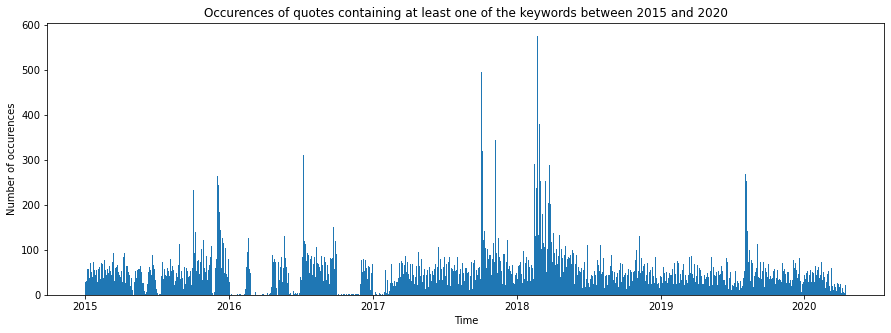

In [86]:
# Plotting number of quotes that contain keywords on the timeframe of the dataset
plt.figure(figsize=(15,5))

plt.hist(df['date'],bins=2000)

plt.title('Occurences of quotes containing at least one of the keywords between 2015 and 2020')
plt.xlabel('Time')
plt.ylabel('Number of occurences')
plt.show()

This histogram gives a good idea of how much people have been speaking of guns/firearms/shootings in the last 5 years in the media. But it has a major flaw: each quote has the same "weight" (one quote accounts for one occurence). But some quotes occure more often then others ('numOccurences' colum in the dataframe). We should take this extra information into account if we want a better view on the data.

In [87]:
# Define a new dataframe for this specific study
df = df_original[['date','numOccurrences']]
df.sample(n=15)

,date,numOccurrences
484556,2019-11-01 05:00:10,5
101559,2015-06-08 06:57:27,1
445773,2018-08-28 10:27:05,1
406888,2018-04-23 02:33:22,4
105733,2015-11-15 12:25:58,1
4460,2015-03-31 23:32:00,1
80608,2015-08-11 04:11:53,2
154510,2016-07-07 20:15:25,3
145603,2016-04-22 14:47:38,5
419959,2018-03-12 00:00:00,61


This sample shows well how some quotes can have very different number of occurences, and therefore highlights how important it is for us to take this parameter into account.

We will now define a new dataframe that contains the number of quotes (multiplied by their respective occurences) containing at least one of the keywords per day.

In [88]:
# We sum all the occurences of each date, and create a "sum" column in the dataframe
df = df['date'].dt.date.value_counts().rename('sum').to_frame()

# The dates are now the indices of the rows. We make them a column again.
df.index.name = 'date'
df.reset_index(inplace=True)

# Convert data column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort dataframe by date
df = df.sort_values(by=['date'])

df.head(n=10)

,date,sum
1417,2015-01-01,28
1185,2015-01-02,39
1392,2015-01-03,29
1391,2015-01-04,29
1074,2015-01-05,45
710,2015-01-06,59
619,2015-01-07,63
597,2015-01-08,64
1143,2015-01-09,42
1206,2015-01-10,38


We now have our desired dataframe: one row is one day, and for each day we have the number of quotes (multiplied by their occurences) that contain at least a keyword.

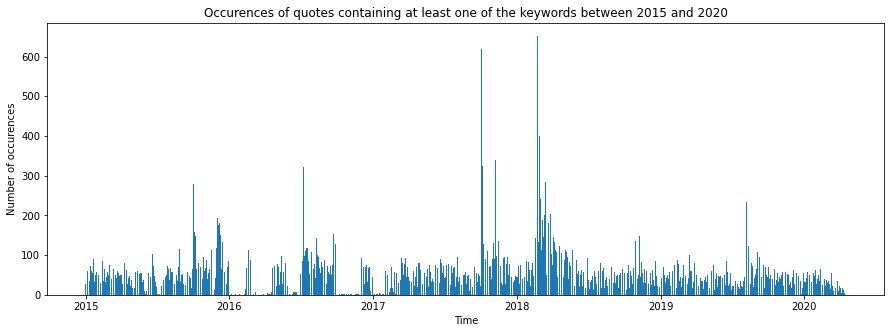

In [89]:
# Plotting number of quotes that contain keywords on the timeframe of the dataset
plt.figure(figsize=(15,5))

# We will use this in a comparitive plot in part 3
backup1 = df[['date','sum']]

plt.bar(df['date'],df['sum'])

plt.title('Occurences of quotes containing at least one of the keywords between 2015 and 2020')
plt.xlabel('Time')
plt.ylabel('Number of occurences')
plt.show()

In the end, we see that this is plot is extremly similar to what we have obtained in the previous histogram. This is probably what data science is about sometimes... But at least we have cleared a possible source of error out of the way. We will be using this specific dataframe in the rest of the analysis.

## 2 - Initial analysis of the "Mother Jone's" dataset

We have also proceeded to some initial analysis of the "Mother Jone's US Mass Shootings" dataset. Indeed, this dataset will give us some basic information about most shootings, such as: date, location, number of fatalities, number of injured, age of shooter, weapon type/legality...

In [32]:
# Reading the csv file
df = pd.read_csv('./Data/MassShootings.csv')

# Drop unrelevant columns (for our initial analysis)
# df = df.drop(columns = ['year', 'summary', 'prior_signs_mental_health_issues', 'mental_health_details', 'mental_health_sources', 'sources_additional_age', 'latitude', 'longitude'])

# Two new columns: location splitted into town and state
df[['town', 'state']] = df['location'].str.split(', ', expand = True)

# Convert date column to datetime format for better handling
df['date'] = pd.to_datetime(df['date'])

# Quotebank dataset is limited to years 2015-2021. Need to use same time span:
df = df.drop(df[df['date'].dt.year < 2015].index)
df = df.drop(df[df['date'].dt.year > 2020].index)

df.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year,town,state
5,Springfield convenience store shooting,"Springfield, Missouri",2020-03-16,"Joaquin S. Roman, 31, went on a rampage culmin...",4,0,4,Workplace,31,-,...,M,https://www.kiro7.com/news/trending/ive-been-s...,-,-,37.210432,-93.236860,Mass,2020,Springfield,Missouri
6,Molson Coors shooting,"Milwaukee, Wisconsin",2020-02-26,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,-,...,M,https://www.jsonline.com/story/news/local/2020...,-,-,43.044511,-87.962537,Mass,2020,Milwaukee,Wisconsin
7,Jersey City kosher market shooting,"Jersey City, New Jersey",2019-12-10,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,-,-,...,Male & Female,https://www.nytimes.com/2019/12/15/nyregion/je...,-,-,40.707363,-74.083609,Spree,2019,Jersey City,New Jersey
8,Pensacola Naval base shooting,"Pensacola, Florida",2019-12-06,"Ahmed Mohammed al-Shamrani, A Saudi Arabian mi...",3,8,11,Military,-,-,...,M,https://www.washingtonpost.com/national-securi...,-,-,30.364707,-87.288567,Mass,2019,Pensacola,Florida
9,Odessa-Midland shooting spree,"Odessa, Texas",2019-08-31,"Seth A. Ator, 36, fired at police officers who...",7,25,32,Other,36,yes,...,M,https://www.washingtonpost.com/politics/5-kill...,https://www.nytimes.com/2019/09/02/us/texas-gu...,-,31.925974,-102.279600,Spree,2019,Odessa,Texas


We notice that some of the entries for age of the shooter are not numbers. To perform further analysis, we will set all the values of this column as floats and replace '-' by NaN.

In [56]:
df['age_of_shooter'] = df['age_of_shooter'].replace('-', np.nan)
df['age_of_shooter'] = df['age_of_shooter'].astype(float)

To give us a first glimpse at the data, we can plot the fatalities per shooting accross time, as well as the distribution of the number of fatalities per shooting.

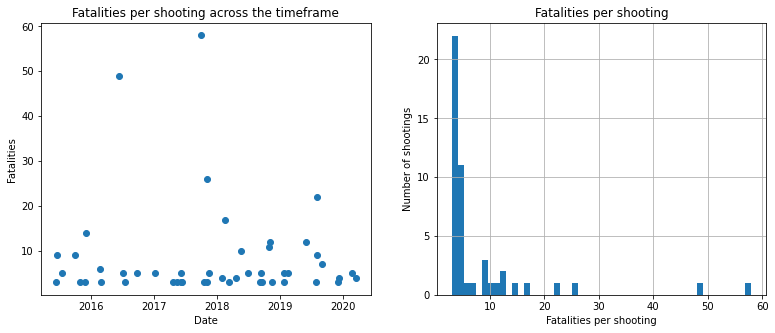

In [4]:
fig, ax = plt.subplots(1,2,figsize=(13,5))

# Plot shootings in (time, number of fatalities) format
ax[0].scatter(df['date'], df['fatalities'])
ax[0].set_title('Fatalities per shooting across the timeframe')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Fatalities');

# Plot the distribution of the number of fatalities
ax[1] = df['fatalities'].hist(bins= 50)
ax[1].set_xlabel('Fatalities per shooting')
ax[1].set_ylabel('Number of shootings')
ax[1].set_title('Fatalities per shooting');

There isn't much data, but we can say it seems to follow a power law: most of the shootings have a small number of fatalities (<10), but some outliers are not unusual either, some shootings having over 40 fatalities.

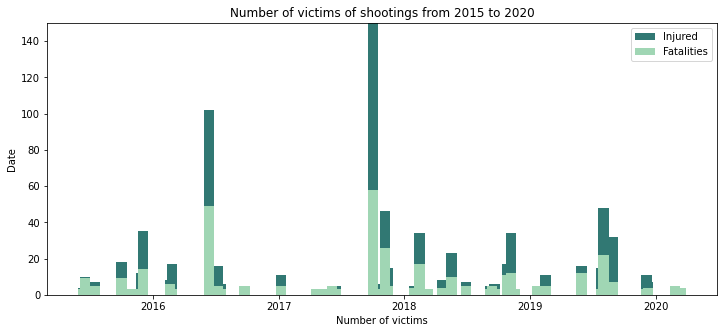

In [5]:
# The distribution of of fatalities, injured, total per month is plotted here
fig, ax = plt.subplots(figsize=(12, 5))
plt.bar(df['date'],df['total_victims'],width=30, color = '#317873')
plt.bar(df['date'],df['fatalities'],width=30, color = '#a0d6b4')
plt.title('Number of victims of shootings from 2015 to 2020')
plt.xlabel('Number of victims')
plt.ylabel('Date')
plt.ylim(top=150)
plt.legend(['Injured','Fatalities'])
plt.show()

There are many paramters to explore, and one of them is location of the event:

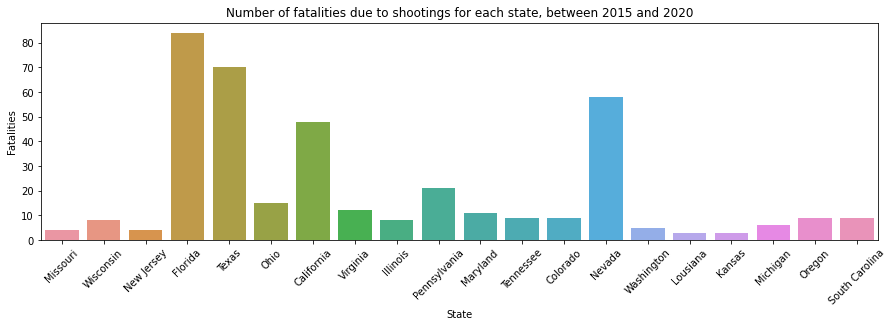

In [6]:
# Ploting the number of fatalities per state

fig, ax = plt.subplots(figsize=(15, 4))
ax = sns.barplot(y = df['fatalities'], x = df['state'], estimator = sum, ci = None)

ax.set_xlabel("State")
ax.set_ylabel("Fatalities")
ax.set_title("Number of fatalities due to shootings for each state, between 2015 and 2020")
plt.xticks(rotation=45)
plt.show()

With the above plot, we can clearly see that states have been very unequally affected by mass shootings. We can try to find some relevant correlations further on, such as average salary in the state, state political position (more of a 'blue state' or a 'red state'), etc. It will also be interesting to see how the location influences the media outrage after the shooting.

We are now interested in performing a linear regression analysis to study the bahavior of fatalities.  We would like to model the fatalities with two predictors : injured persons and age of the shooter. Our results could then help us understand better how medias are treating subjects according to number of death versus injured or the age of the shooter.

In [ ]:
# Declares the model
mod = smf.ols(formula='fatalities ~ injured + age_of_shooter', data=df, missing = 'drop')
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
res = mod.fit()
# Print thes summary output provided by the library.
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             fatalities   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     31.45
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           3.84e-09
Time:                        15:04:13   Log-Likelihood:                -154.29
No. Observations:                  46   AIC:                             314.6
Df Residuals:                      43   BIC:                             320.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.0035      3.509      3.

Firstly, we notice that age of shooter is not a significant predictor (p=0.1), but injured is (p=000). 
The model can be interpreted as fatalities = 12 + 0.11*injured -0.17* age_of_shooter

Finally, we will use this dataframe in comparitive plots in part 3. Therefore we save it to a new dataframe (in case we want to overwrite "df" further on):

In [7]:
backup2 = df[['date','fatalities']]

## 3 - Linking the two datasets

We will start by plotting a single timeline graph with the number of fatalities due to shootings over time, as well as the occurence of gun-related words in the media.

NameError: name 'backup1' is not defined

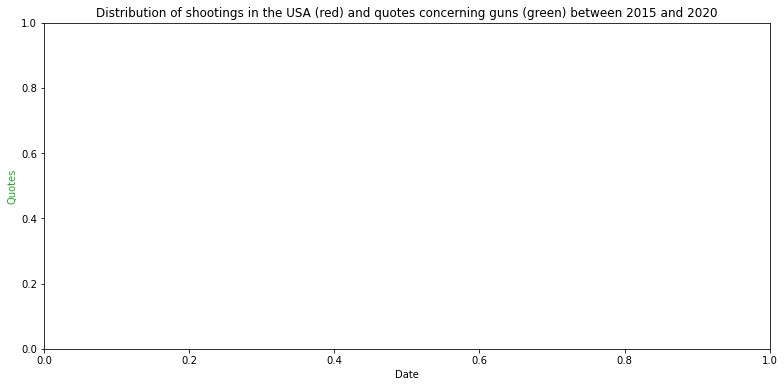

In [8]:
fig, ax1 = plt.subplots(figsize=(13,6))

# Plotting the quotes over time (green)
color = 'tab:green'
ax1.set_title('Distribution of shootings in the USA (red) and quotes concerning guns (green) between 2015 and 2020')
ax1.set_xlabel('Date')
ax1.set_ylabel('Quotes', color=color)
ax1.bar(backup1['date'], backup1['sum'], color=color, alpha=0.3, width = 3)
ax1.tick_params(axis='y', labelcolor=color)

# Same x-axis, but different y axis
ax2 = ax1.twinx()

# Plotting the fatalities due to shootings over time (red)
color = 'tab:red'
ax2.set_ylabel('Fatalities', color=color)  # we already handled the x-label with ax1
ax2.bar(backup2['date'], backup2['fatalities'], color=color, alpha=0.9, width = 3)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

We can see several interesting events in this first plot. For example, the largest peak in fatalities happens around october 2017. It is followed by the second largest peak in quotes talking about guns.

In [96]:
# Print the largest shooting (most fatalities)
backup2 = backup2.sort_values(by='fatalities',ascending=False)
backup2 = backup2.reset_index(drop=True)
print("The largest shooting was:")
print(backup2.iloc[0])

# Quotes following the shooting (two days after)
backup1 = backup1.sort_values(by='sum',ascending=False)
print("\nThe corresponding peak in quotes discussing guns was:")
print(backup1.iloc[1])

The largest shooting was:
date          2017-10-01 00:00:00
fatalities                     58
Name: 0, dtype: object

The corresponding peak in quotes discussing guns was:
date    2017-10-03 00:00:00
sum                     620
Name: 1, dtype: object


With the above print, we see that this peak is maximal exactly two days after the shooting.
 
Another interesting observation we can make is that the largest peak in quotes concerning guns takes place after a smaller shooting, in early 2018:

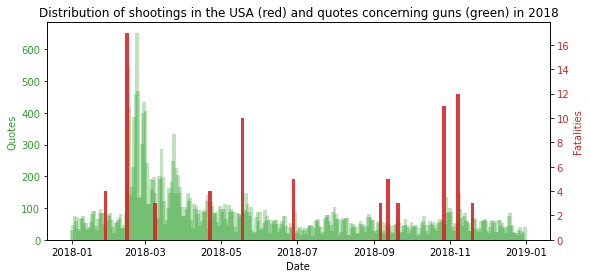

In [97]:
# We want to zoom in by looking only at 2018
backup1_2018 = backup1[(backup1['date'].dt.year==2018)]
backup2_2018 = backup2[(backup2['date'].dt.year==2018)]

fig, ax1 = plt.subplots(figsize=(9,4))

# Plotting the quotes over time (green barplot)
color = 'tab:green'
ax1.set_title('Distribution of shootings in the USA (red) and quotes concerning guns (green) in 2018')
ax1.set_xlabel('Date')
ax1.set_ylabel('Quotes', color=color)
ax1.bar(backup1_2018['date'], backup1_2018['sum'], color=color, alpha=0.3, width = 3)
ax1.tick_params(axis='y', labelcolor=color)

# Same x-axis, but different y axis
ax2 = ax1.twinx()

# Plotting the fatalities due to shootings over time (red barplot)
color = 'tab:red'
ax2.set_ylabel('Fatalities', color=color)  # we already handled the x-label with ax1
ax2.bar(backup2_2018['date'], backup2_2018['fatalities'], color=color, alpha=0.9, width = 3)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

It seams that this particular event has made much more noise then the others and over a larger period of time. The fact that it was certainly not the shooting with the most fatalities ("only" 17, compared to 58 for the max) shows that the number of fatalities is clearly not the only parameter that influences the media coverage of the event as well as the amplitude of the discussion on gun control afterwards.

This makes us want to investigate further: what are the other factors that can explain these differences? Some ideas: 
- Location of the shooting (what state, but also what type of place: e.g. at a school, workplace...)
- Wheather of not the weapon was bought legally
- Age, gender and ethnicity of the shooter and/or the victims
- The type of weapon that was used (semi-automatic...)
- etc.

Just to give us an idea, we can look at the corresponding case in the dataframe and get all the details we know about it:

In [98]:
df = df[(df['date'].dt.year==2018)]
df = df.sort_values(by='fatalities', ascending=False)
df.iloc[0]

case                                    Marjory Stoneman Douglas High School shooting
location                                                            Parkland, Florida
date                                                              2018-02-14 00:00:00
summary                             Nikolas J. Cruz, 19, heavily armed with an AR-...
fatalities                                                                         17
injured                                                                            17
total_victims                                                                      34
location.1                                                                     School
age_of_shooter                                                                     19
prior_signs_mental_health_issues                                                  Yes
mental_health_details               Cruz had a long history of behavioral problems...
weapons_obtained_legally                              